<a href="https://colab.research.google.com/github/KARENCMP82/Python/blob/main/DSC1124ESP_Actividad_DL_Grupo_XX.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Deep Learning
## Actividad 1: Deep Vision

Nombre alumn@ 1

Nombre alumn@ 2

...


# Actividad Deep Vision

Diseñar y comparar dos estrategias para la clasificación de imágenes en el dataset CIFAR100 de Keras (https://keras.io/api/datasets/cifar100/)

### **Estrategia 1: Red pre-entrenada**

La primera estrategia a comparar debe incluir la utilización de redes preentrenadas con el dataset ImageNet, llevando a cabo tareas de *transfer learning* y *fine-tuning* para clasificar los objetos de CIFAR100. Deben compararse al menos dos tipos de arquitecturas (VGGs, ResNet50, Xception, InceptionV3, InceptionResNetV2, MobileNetV2, DenseNet, ResNet...) y se debe seleccionar la que mayor precisión nos dé (información sobre las arquitecturas disponibles en https://keras.io/applications/). Se espera que el ejercicio presente una profunda experimentación haciendo uso todas las técnicas de optimización mostradas en clase de forma justificada para la mejora del rendimiento de la red neuronal (weight regularization, dropout, batch normalization, data augmentation, etc.).

### **Estrategia 2: Entrenar desde cero o from scratch**

La segunda estrategia a comparar será una red neuronal que se debe diseñar, entrenar y optimizar. Se requiere una justificación empírica de las decisiones que llevaron a la selección de atributos, capas e hiperparámetros a los que se ha llegado. Se espera que el ejercicio presente una profunda experimentación haciendo uso de todas las técnicas de optimización mostradas en clase de forma justificada para la mejora del rendimiento de la red neuronal (weight regularization, dropout, batch normalization, data augmentation...).

## Normas a seguir

- Se debe entregar un **ÚNICO GOOGLE COLAB notebook** (archivo .ipynb) que incluya las instrucciones presentes y su **EJECUCIÓN!!!**. Debe aparecer todo el proceso seguido (carga de datos, visualización de datos, proceso de entrenamiento y proceso de validación del modelo).
- Poner el nombre del grupo en el nombre del archivo y el nombre de todos los integrantes del grupo al inicio del notebook.
- Las redes utilizadas deben estar entrenadas y con las métricas extraídas en el conjunto de test.
- Es recomendable crear una última sección de texto en el notebook en la que se discutan los diferentes modelos obtenidos y se extraigan las conclusiones pertinentes.

## Criterio de evaluación

- Seguimiento de las normas establecidas en la actividad.
- Efectividad al presentar las comparaciones entre métricas de evaluación de ambos modelos.
- Demostración de la utilización de técnicas de optimización para mejorar el rendimiento de los modelos.
- Modelos predictivos con rendimiento superior al aleatorio.
- Corrección en el uso de algoritmos, modelos y formas idiomáticas en Python.
- El código debe poder ejecutarse sin modificación alguna en Google Colaboratory.

Recomendaciones en el Uso de Colab:

- Eliminar las variables innecesarias para liberar RAM mediante la sentencia:

In [2]:
from tensorflow.keras.datasets import cifar100
import matplotlib.pyplot as plt
# Importar las bibliotecas necesarias
import h5py  # Biblioteca para interactuar con archivos HDF5 (formato común para guardar grandes datasets)
import numpy as np # Biblioteca para operaciones numéricas, especialmente con arrays
import keras as ks
from keras.models import Sequential
from keras.layers import Flatten, Dense, Dropout, Activation
import random
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.applications import VGG16
from tensorflow.keras.preprocessing.image import ImageDataGenerator


x_train: Son las imágenes que usarás para entrenar tu red neuronal. Es el conjunto de datos más grande, con el que el modelo "aprende".

y_train: Son las etiquetas correctas (números del 0 al 99 que representan cada categoría) correspondientes a cada imagen en x_train. Le dicen al modelo cuál es la respuesta correcta durante el entrenamiento.

x_test: Son las imágenes que usarás para probar qué tan bien ha aprendido tu modelo después de entrenarlo. El modelo no ve estas imágenes durante el entrenamiento.

y_test: Son las etiquetas correctas correspondientes a cada imagen en x_test. Las usas para comparar las predicciones del modelo en x_test y ver cuántas acierta.

In [3]:
# Carga de datos
print("[INFO]: Loading CIFAR-100 data...")
((x_train, y_train), (x_test, y_test)) = cifar100.load_data()

[INFO]: Loading CIFAR-100 data...
169001437/169001437 ━━━━━━━━━━━━━━━━━━━━ 4s 0us/step


In [4]:
nombresEtiquetas = ['manzana', 'pez_de_acuario', 'bebé', 'oso', 'castor', 'cama', 'abeja', 'escarabajo', 'bicicleta', 'botella', 'cuenco', 'niño', 'puente', 'autobús', 'mariposa', 'camello', 'lata', 'castillo', 'oruga', 'ganado', 'silla', 'chimpancé',
                    'reloj', 'nube', 'cucaracha', 'sofá', 'cangrejo', 'cocodrilo', 'taza', 'dinosaurio', 'delfín', 'elefante', 'pez_plano', 'bosque', 'zorro', 'niña', 'hámster', 'casa', 'canguro', 'teclado', 'lámpara', 'cortacésped', 'leopardo', 'león',
                    'lagarto', 'langosta', 'hombre', 'arce', 'motocicleta', 'montaña', 'ratón', 'hongo', 'roble', 'naranja', 'orquídea', 'nutria', 'palmera', 'pera', 'camioneta', 'pino', 'llanura', 'plato', 'amapola', 'puercoespín', 'zarigüeya', 'conejo',
                    'mapache', 'raya', 'carretera', 'cohete', 'rosa', 'mar', 'foca', 'tiburón', 'musaraña', 'mofeta', 'rascacielos', 'caracol', 'serpiente', 'araña', 'ardilla', 'tranvía', 'girasol', 'pimiento_dulce', 'mesa', 'tanque', 'teléfono',
                    'televisión', 'tigre', 'tractor', 'tren', 'trucha', 'tulipán', 'tortuga', 'armario', 'ballena', 'sauce', 'lobo', 'mujer', 'gusano']

In [5]:
# Imagina que el modelo predice el número 0
numero_predicho = 6

# Para mostrar el nombre en español
print("El objeto es:", nombresEtiquetas[numero_predicho])
# Salida: El objeto es: manzana

El objeto es: abeja


Mira tus datos: Comprueba las formas (.shape) y visualiza alguna imagen (plt.imshow).

Prepara tus datos: Normaliza las imágenes (/ 255.0) y convierte las etiquetas a one-hot (to_categorical).

Ver dimensiones: Añade estas líneas en una nueva celda para ver cuántas imágenes tienes y de qué tamaño son:

In [6]:
print("Forma de x_train:", x_train.shape)
# Salida esperada: (50000, 32, 32, 3) -> 50000 imágenes de entrenamiento, 32x32 píxeles, 3 canales de color (RGB)
print("Forma de y_train:", y_train.shape)
# Salida esperada: (50000, 1) -> 50000 etiquetas (números del 0 al 99)
print("Número total de categorías:", len(nombresEtiquetas))
# Salida esperada: 100

Forma de x_train: (50000, 32, 32, 3)
Forma de y_train: (50000, 1)
Número total de categorías: 100


Mostrar una imagen: Añade esto para ver una imagen al azar y su etiqueta en español:

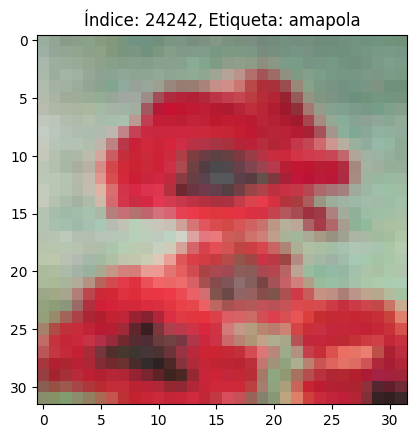

In [7]:
# Genera un índice aleatorio entre 0 y el tamaño del conjunto de entrenamiento menos 1
indice_aleatorio = random.randint(0, x_train.shape[0] - 1)

# Muestra la imagen en el índice aleatorio generado
plt.imshow(x_train[indice_aleatorio])

# Establece el título de la imagen con el índice y la etiqueta correspondiente
plt.title(f"Índice: {indice_aleatorio}, Etiqueta: {nombresEtiquetas[y_train[indice_aleatorio][0]]}")

# Muestra la imagen con el título en una ventana gráfica
plt.show()

Normalizar Píxeles: Las imágenes tienen valores de píxel de 0 a 255. Es mejor que estén entre 0 y 1. Divide x_train y x_test por 255.0:

In [8]:
# Normaliza los valores de x_train dividiendo cada valor por 255.0
x_train_norm = x_train / 255.0

# Normaliza los valores de x_test dividiendo cada valor por 255.0
x_test_norm = x_test / 255.0

# (Opcional) Verificar que la normalización funcionó correctamente
print("Valor máximo después de normalizar:", x_train_norm.max())  # Imprime el valor máximo de x_train_norm
print("Valor mínimo después de normalizar:", x_train_norm.min())  # Imprime el valor mínimo de x_train_norm

Valor máximo después de normalizar: 1.0
Valor mínimo después de normalizar: 0.0


Convertir Etiquetas (One-Hot Encoding): Las redes de clasificación suelen necesitar que las etiquetas (0-99) se conviertan en vectores donde solo un elemento es 1 y el resto 0 (ej: el número 2 se convierte en [0, 0, 1, 0, ...] si hay muchas clases). Usa to_categorical:

In [9]:
num_classes = 100 # Número total de categorías en CIFAR-100
y_train_cat = to_categorical(y_train, num_classes)
y_test_cat = to_categorical(y_test, num_classes)

# (Opcional) Verificar la nueva forma
print("Forma de y_train después de to_categorical:", y_train_cat.shape)
# Salida esperada: (50000, 100)
print("Ejemplo etiqueta 0 después de to_categorical:", y_train_cat[0])

Forma de y_train después de to_categorical: (50000, 100)
Ejemplo etiqueta 0 después de to_categorical: [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0.]


1.	Elegir una Red Pre-entrenada: Keras VGG16

In [10]:
# Cargar la base convolucional de VGG16 pre-entrenada en ImageNet
# sin incluir las capas finales de clasificación (include_top=False)
# y especificando la forma de nuestras imágenes CIFAR-100 (input_shape)
conv_base = VGG16(weights='imagenet',
                  include_top=False,
                  input_shape=(32, 32, 3))

58889256/58889256 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [11]:
# Bloquear las capas de la base VGG16 para que no se entrenen
conv_base.trainable = False

Aplanar (Flatten): La salida de conv_base es un "mapa" (tiene alto, ancho, profundidad). Las capas de clasificación (Dense) necesitan una "fila" plana de números. Necesitas una capa que haga esa conversión. Pista: Busca la capa Flatten en Keras.

In [12]:
model = Sequential()

#Aplanar la salida de conv_base:
model.add(Flatten())

#Añadir capas densas
model.add(Dense(256, activation='relu'))#relu hace aprender las relaciones no lineales
model.add(Dropout(0.5)) #desactiva aleatoriamente el 50% de las neuronas
model.add(Dense(num_classes, activation='softmax')) #softmax convierte las salidas en probabilidades
model.add(conv_base)

**rmsprop** es un optimizador que ajusta los pesos del modelo durante el entrenamient

**categorical_crossentropy** es una función de pérdida utilizada para problemas de clasificación multiclase

**ccuracy** es una métrica que evalúa el rendimiento del modelo

In [13]:
#Compilar el modelo
model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

ImageDataGenerator(rescale=1./255): Normaliza las imágenes dividiendo los valores de los píxeles por 255

In [14]:
# Dimensiones de las imágenes
img_width, img_height = 32, 32  # CIFAR-100 tiene imágenes de 32x32 píxeles

# Directorios de datos de entrenamiento y validación
train_data_dir = 'Prueba1/Train'
validation_data_dir = 'Prueba1/Valid'

# Número de muestras de entrenamiento y validación
nb_train_samples = 50000  # CIFAR-100 tiene 50000 imágenes de entrenamiento
nb_validation_samples = 10000  # CIFAR-100 tiene 10000 imágenes de prueba

# Número de épocas y tamaño del lote
epochs = 30
batch_size = 32

# Preparar los generadores de datos
train_datagen = ImageDataGenerator(rescale=1./255)
validation_datagen = ImageDataGenerator(rescale=1./255)

La Idea: Ahora que tienes la arquitectura definida y compilada, tienes que "enseñarle" a la parte nueva del modelo (la "cabeza" que añadiste) a clasificar las imágenes de CIFAR-100. Para eso, le muestras las imágenes de entrenamiento (x_train_norm) y sus etiquetas correctas (y_train_cat) muchas veces (durante las epochs que definiste).

**train_datagen**.flow_from_directory: Esta función crea un generador de datos que carga las imágenes desde el directorio especificado (train_data_dir).
train_data_dir: Especifica el directorio donde se encuentran las imágenes de entrenamiento.

**target_size**=(img_width, img_height): Redimensiona todas las imágenes a las dimensiones especificadas (en este caso, 32x32 píxeles).
**batch_size**=batch_size: Define el tamaño del lote, es decir, el número de imágenes que se procesan en cada paso de entrenamiento.

**class_mode**='binary': Indica que las etiquetas son binarias (0 o 1). Esto es adecuado para problemas de clasificación binaria, pero para CIFAR-100, deberías usar 'categorical' en lugar de 'binary'.

**validation_datagen**.flow_from_directory: Similar a train_datagen.flow_from_directory, pero para el conjunto de datos de validación.
validation_data_dir: Especifica el directorio donde se encuentran las imágenes de validación.

**target_size**=(img_width, img_height): Redimensiona todas las imágenes de validación a las dimensiones especificadas (32x32 píxeles).

**batch_size**=batch_size: Define el tamaño del lote para el conjunto de validación.
class_mode='binary': Indica que las etiquetas son binarias. Para CIFAR-100, deberías usar 'categorical'.

In [16]:
train_generator = train_datagen.flow_from_directory(
    train_data_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='binary')

validation_generator = validation_datagen.flow_from_directory(
    validation_data_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='binary')

FileNotFoundError: [Errno 2] No such file or directory: 'Prueba1/Train'

In [ ]:
history = model.fit(
    train_generator,  # Generador de datos de entrenamiento
    steps_per_epoch=nb_train_samples // batch_size,  # Número de pasos por época
    epochs=epochs,  # Número de épocas
    validation_data=validation_generator,  # Generador de datos de validación
    validation_steps=nb_validation_samples // batch_size  # Número de pasos de validación por época
)